<a href="https://colab.research.google.com/github/Maithraanand/Financial-Machine-Learning-FML-/blob/main/RoboAdvisorDashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
required = {'dash', 'dash-core-components', 'dash-html-components', 'dash-daq', 'cvxopt' }
missing = required - installedPackages
if missing:
    !pip install dash
    !pip install dash-core-components
    !pip install dash-html-components
    !pip install dash-daq
    !pip install cvxopt

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:32: UserWarning: Setuptools is replacing distutils. Support for replacing an already imported distutils is deprecated. In the future, this condition will fail. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 642.7/642.7 kB 8.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for dash-daq: filename=dash_daq-0.5.0-py3-none-any.whl size=669693 sha256=9012ac3e00b3e3a5365d132f25ce0dfe274489b9bf6547944286d1720520345a
  Stored in directory: /root/.cache/pip/wheels/75/14/1b/208d09d5e239391048bdc167759977b41ba65a3d4063aebf6b
Successfully built dash-daq


In [2]:
!pip install --upgrade dash

In [3]:
!pip install --upgrade Werkzeug

In [4]:
import dash
from dash import dcc
from dash import html
from dash.dependencies import Input,Output,State
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import dash_daq as daq
from pickle import load

In [5]:
import cvxopt as opt

**Load the Data**

In [6]:
investors = pd.read_csv('InputData.csv', index_col = 0 )
investors.head(1)

,AGE07,EDCL07,MARRIED07,KIDS07,LIFECL07,OCCAT107,INCOME07,RISK07,WSAVED07,SPENDMOR07,NETWORTH07,TrueRiskTol
0,47,2,1,0,2,1,56443.744181,3,1,5,352641.7113,6.947439


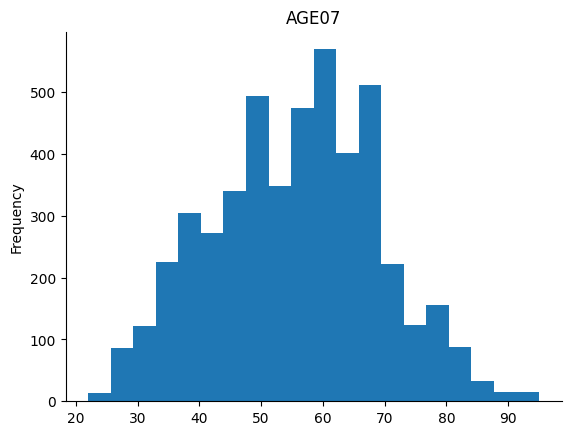

In [7]:
# @title AGE07

from matplotlib import pyplot as plt
investors['AGE07'].plot(kind='hist', bins=20, title='AGE07')
plt.gca().spines[['top', 'right',]].set_visible(False)

**Load the market data and clean it**

In [8]:
assets = pd.read_csv('SP500Data.csv', index_col=0)
missing_fractions = assets.isnull().mean().sort_values(ascending=False)
print(missing_fractions.head(10))
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
assets.drop(labels=drop_list, axis=1, inplace=True)
print(assets.shape)
assets = assets.ffill()
print(assets.head(2))

CTVA    0.781250
DOW     0.678571
FOX     0.667411
FOXA    0.665179
NOV     0.000000
MSI     0.000000
MSCI    0.000000
MYL     0.000000
NDAQ    0.000000
ABT     0.000000
dtype: float64
(448, 498)
                  ABT       ABBV        ABMD         ACN       ATVI  \
Date                                                                  
2018-01-02  58.790001  98.410004  192.490005  153.839996  64.309998   
2018-01-03  58.919998  99.949997  195.820007  154.550003  65.309998   

                  ADBE    AMD         AAP    AES         AMG  ...        WLTW  \
Date                                                          ...               
2018-01-02  177.699997  10.98  106.089996  10.88  203.039993  ...  146.990005   
2018-01-03  181.039993  11.55  107.050003  10.87  202.119995  ...  149.740005   

                  WYNN        XEL        XRX       XLNX        XYL        YUM  \
Date                                                                            
2018-01-02  164.300003  47.81000

In [9]:
options=np.array(assets.columns)
options = []
for tic in assets.columns:
    mydict = {}
    mydict['label'] = tic
    mydict['value'] = tic
    options.append(mydict)

In [10]:
print(mydict)

{'label': 'ZTS', 'value': 'ZTS'}


In [11]:
print(options)

[{'label': 'ABT', 'value': 'ABT'}, {'label': 'ABBV', 'value': 'ABBV'}, {'label': 'ABMD', 'value': 'ABMD'}, {'label': 'ACN', 'value': 'ACN'}, {'label': 'ATVI', 'value': 'ATVI'}, {'label': 'ADBE', 'value': 'ADBE'}, {'label': 'AMD', 'value': 'AMD'}, {'label': 'AAP', 'value': 'AAP'}, {'label': 'AES', 'value': 'AES'}, {'label': 'AMG', 'value': 'AMG'}, {'label': 'AFL', 'value': 'AFL'}, {'label': 'A', 'value': 'A'}, {'label': 'APD', 'value': 'APD'}, {'label': 'AKAM', 'value': 'AKAM'}, {'label': 'ALK', 'value': 'ALK'}, {'label': 'ALB', 'value': 'ALB'}, {'label': 'ARE', 'value': 'ARE'}, {'label': 'ALXN', 'value': 'ALXN'}, {'label': 'ALGN', 'value': 'ALGN'}, {'label': 'ALLE', 'value': 'ALLE'}, {'label': 'AGN', 'value': 'AGN'}, {'label': 'ADS', 'value': 'ADS'}, {'label': 'LNT', 'value': 'LNT'}, {'label': 'ALL', 'value': 'ALL'}, {'label': 'GOOGL', 'value': 'GOOGL'}, {'label': 'GOOG', 'value': 'GOOG'}, {'label': 'MO', 'value': 'MO'}, {'label': 'AMZN', 'value': 'AMZN'}, {'label': 'AMCR', 'value': 'A

**Dashboard Interface**

In [12]:
app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

In [13]:
app.layout = html.Div([
    html.Div([
        html.Div([
            html.H3(children='Robo Advisor Dashboard'),
            html.Div([
                html.H5(children='Step 1 : Enter Investor Characteristics '),
                ],style={'display': 'inline-block','vertical-align': 'top',  'width': '30%',\
                         'color':'black', 'background-color': 'LightGray'}),
            html.Div([
                html.H5(children='Step 2 : Asset Allocation and portfolio performance'),
                ],style={'display': 'inline-block', 'vertical-align': 'top',  \
                         'color':'white','horizontalAlign' : "left", 'width': '70%', 'background-color':'black'}),
            ],style={'font-family': 'calibri'}),
         html.Div([
          html.Div([
            html.Label('Age:',style={'padding': 5}),
            dcc.Slider(
                id='Age',
                min = investors['AGE07'].min(),
                max = 70,
                marks={ 25: '25',35: '35',45: '45',55: '55',70: '70'},
                value=25),
            #html.Br(),
              html.Label('NetWorth:', style={'padding': 5}),
            dcc.Slider(
                id='Nwcat',
                #min = investors['NETWORTH07'].min(),
                min = -1000000, max = 3000000,
                marks={-1000000: '-$1M',0: '0',500000: '$500K',1000000: '$1M',2000000: '$2M',},
                value=10000),
            #html.Br(),
            html.Label('Income:', style={'padding': 5}),
            dcc.Slider(
                id='Inccl',
                #min = investors['INCOME07'].min(), max = investors['INCOME07'].max(),
                min = -1000000,
                max = 3000000,
                marks={-1000000: '-$1M',0: '0',500000: '$500K',1000000: '$1M',2000000: '$2M',},
                value=100000),
           # html.Br(),
            html.Label('Education Level (scale of 4):', style={'padding': 5}),
            dcc.Slider(
                id='Edu',
                min = investors['EDCL07'].min(), max = investors['EDCL07'].max(),
                marks={ 1: '1',2: '2',3: '3',4: '4'},
                value=2),
            #html.Br(),
            html.Label('Married:', style={'padding': 5}),
            dcc.Slider(
                id='Married',
                min = investors['MARRIED07'].min(), max = investors['MARRIED07'].max(),
                marks={ 1: '1',2: '2'},
                value=1),
            #html.Br(),
            html.Label('Kids:', style={'padding': 5}),
            dcc.Slider(
                id='Kids',
                min = investors['KIDS07'].min(), max = investors['KIDS07'].max(),
                #marks={ 1: '1',2: '2',3: '3',4: '4'},
                marks=[{'label': j, 'value': j} for j in investors['KIDS07'].unique()],
                value=3),
            #html.Br(),
              html.Label('Occupation:', style={'padding': 5}),
            dcc.Slider(
                id='Occ',
                min = investors['OCCAT107'].min(), max = investors['OCCAT107'].max(),
                marks={ 1: '1',2: '2',3: '3',4: '4'},
                value=3),
            #html.Br(),
            html.Label('Willingness to take Risk:', style={'padding': 5}),
            dcc.Slider(
                id='Risk',
                min = investors['RISK07'].min(), max = investors['RISK07'].max(),
                marks={ 1: '1',2: '2',3: '3',4: '4'},
                value=3),
            #html.Br(),
            html.Button(id='investor_char_button',
                            n_clicks = 0,
                            children = 'Calculate Risk Tolerance',
                            style = {'fontSize': 13, 'marginLeft': '30px', 'color' : 'white',\
                                     'horizontal-align': 'left','backgroundColor': 'grey'}),
            #html.Br(),
              ],style={'width': '80%'}),

            ],style={'width': '30%', 'font-family': 'calibri','vertical-align': 'top','display': 'inline-block'\
                     }),
#                     , "border":".5px black solid"}),
    # ********************Risk Tolerance Charts********
        html.Div([
               #html.H5(children='Step 2 : Enter the Instruments for the allocation portfolio'),
        html.Div([
            html.Div([
                html.Label('Risk Tolerance (scale of 100) :', style={'padding': 5}),
                dcc.Input(id= 'risk-tolerance-text'),

                ],style={'width': '100%','font-family': 'calibri','vertical-align': 'top','display': 'inline-block'}),
            html.Div([
                html.Label('Select the assets for the portfolio:', style={'padding': 5}),
                dcc.Dropdown(
                        id='ticker_symbol',
                        options = options,
                        value = ['GOOGL', 'FB', 'GS','MS','GE','MSFT'],
                        multi = True
                        # style={'fontSize': 24, 'width': 75}
                        ),
                html.Button(id='submit-asset_alloc_button',
                            n_clicks = 0,
                            children = 'Submit',
                            style = {'fontSize': 13, 'marginLeft': '25px','color' : 'white', 'backgroundColor': 'grey'}
                ),
               ],style={'width': '100%','font-family': 'calibri','vertical-align': 'top','display': 'inline-block'}),
            ],style={'width': '100%','display': 'inline-block','font-family': 'calibri','vertical-align': 'top'}),
           html.Div([
                html.Div([
                    dcc.Graph(id='Asset-Allocation'),
                    ], style={'width': '50%', 'vertical-align': 'top', 'display': 'inline-block', \
                      'font-family': 'calibri', 'horizontal-align': 'right'}),
                html.Div([
                    dcc.Graph(id='Performance')
                    ], style={'width': '50%', 'vertical-align': 'top', 'display': 'inline-block', \
                      'font-family': 'calibri', 'horizontal-align': 'right'}),
                   ], style={'width': '100%', 'vertical-align': 'top', 'display': 'inline-block', \
                          'font-family': 'calibri', 'horizontal-align': 'right'}),
            ], style={'width': '70%','display': 'inline-block','font-family': 'calibri','vertical-align': 'top', 'horizontal-align': 'right'}),
       ],style={'width': '70%','display': 'inline-block','font-family': 'calibri','vertical-align': 'top'}),
  ])

In [14]:
def predict_riskTolerance(X_input):
    filename = 'finalized_model_risk_tolerance.sav'
    loaded_model = load(open(filename, 'rb'))
    predictions = loaded_model.predict(X_input)
    return predictions

In [15]:
def get_asset_allocation(riskTolerance,stock_ticker):
    assets_selected = assets.loc[:,stock_ticker]
    return_vec = np.array(assets_selected.pct_change().dropna(axis=0)).T
    n = len(return_vec)
    returns = np.asmatrix(return_vec)
    mus = 1-riskTolerance
    S = opt.matrix(np.cov(return_vec))
    pbar = opt.matrix(np.mean(return_vec, axis=1))
    G = -opt.matrix(np.eye(n))
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
    w=portfolios['x'].T
    print (w)
    Alloc =  pd.DataFrame(data = np.array(portfolios['x']),index = assets_selected.columns)
    portfolios = solvers.qp(mus*S, -pbar, G, h, A, b)
    returns_final=(np.array(assets_selected) * np.array(w))
    returns_sum = np.sum(returns_final,axis =1)
    returns_sum_pd = pd.DataFrame(returns_sum, index = assets.index )
    returns_sum_pd = returns_sum_pd - returns_sum_pd.iloc[0,:] + 100
    return Alloc,returns_sum_pd

In [16]:
@app.callback(
    [
        Output('risk-tolerance-text', 'value')
    ],
    [
        Input('investor_char_button', 'n_clicks'),
        Input('Age', 'value'),
        Input('Nwcat', 'value'),
        Input('Inccl', 'value'),
        Input('Risk', 'value'),
        Input('Edu', 'value'),
        Input('Married', 'value'),
        Input('Kids', 'value'),
        Input('Occ', 'value')
    ]
)

def update_risk_tolerance(n_clicks,Age,Nwcat,Inccl,Risk,Edu,Married,Kids,Occ):
    RiskTolerance = 0
    if n_clicks != None:
        X_input = [[Age,Edu,Married,Kids,Occ,Inccl, Risk,Nwcat]]
        RiskTolerance= predict_riskTolerance(X_input)
    return list([round(float(RiskTolerance*100),2)])

In [17]:
@app.callback(
    [
        Output('Asset-Allocation', 'figure'),
        Output('Performance', 'figure')
    ],
    [
        Input('submit-asset_alloc_button', 'n_clicks'),
        Input('risk-tolerance-text', 'value')
    ],
    [
        State('ticker_symbol', 'value')
    ]
)

def update_asset_allocationChart(n_clicks, risk_tolerance, stock_ticker):
    Allocated, InvestmentReturn = get_asset_allocation(risk_tolerance,stock_ticker)
    return [{'data' : [go.Bar(
                        x=Allocated.index,
                        y=Allocated.iloc[:,0],
                        marker=dict(color='red'),
                    ),
                    ],
            'layout': {'title':" Asset allocation - Mean-Variance Allocation"}

       },
            {'data' : [go.Scatter(
                        x=InvestmentReturn.index,
                        y=InvestmentReturn.iloc[:,0],
                        name = 'OEE (%)',
                        marker=dict(color='red'),
                    ),
                    ],
            'layout': {'title':"Portfolio value of $100 investment"}
       }]

In [18]:
if __name__ == '__main__':
    app.run_server()

<IPython.core.display.Javascript object>